In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
from tabulate import tabulate
import random

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,StackingRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

In [2]:
# Reading first data
movie_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_movies.csv")
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
# Reading second Data
credit_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_credits.csv")
credit_df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
# dropping title feature
movie_df.drop("title",axis=1,inplace=True)

In [5]:
# Merging Two Dataframe
movie_data=movie_df.merge(credit_df,left_on='id', right_on='movie_id')
movie_data.drop("movie_id",axis=1,inplace=True)
movie_data.head(2)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
# Shape of the data
movie_data.shape

(4803, 20)

In [7]:
# Data Information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

In [8]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

,number of nulls,percentage of nulls
budget,0.0,0.000000
genres,0.0,0.000000
homepage,3091.0,64.355611
id,0.0,0.000000
keywords,0.0,0.000000
original_language,0.0,0.000000
overview,3.0,0.062461
popularity,0.0,0.000000
production_companies,0.0,0.000000
production_countries,0.0,0.000000


In [9]:
# unique values in each feature.
movie_data.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
status                     3
tagline                 3944
vote_average              71
vote_count              1609
title                   4800
cast                    4761
crew                    4776
dtype: int64

In [10]:
# Null value imputation.
movie_data.drop("homepage",axis=1,inplace=True)
movie_data["tagline"].fillna("Unknown_tagline",inplace=True)
movie_data["overview"].fillna("Unknown_overview",inplace=True)
movie_data["runtime"].fillna(round(movie_data["runtime"].mean()),inplace=True)

In [11]:
# converting release date feature datatype object to datetime and two new features created year and month.
movie_data['release_year'] = pd.DatetimeIndex(movie_data['release_date']).year
movie_data['release_month'] = pd.DatetimeIndex(movie_data['release_date']).month

In [12]:
# checking for duplicated records.
movie_data.duplicated().sum()

0

In [13]:
# Description of the data
movie_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4802.000000,4802.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875911,6.092172,690.217989,2002.468763,6.642232
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607225,1.194612,1234.585891,12.414354,3.534499
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,4.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000,7.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000,2011.000000,10.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,12.000000


In [14]:
# created a function to convert json to str(string) format
def json_to_string(row):
    json_data = json.loads(row)
    values=[data.get("name") for data in json_data]   
    return values[:]

In [15]:
# Extracted the Genre Type from genres
d_genre = movie_data["genres"].apply(json_to_string)

movie_data["genre_type"] = d_genre.apply(lambda x:x[0] if len(x)>=1 else None)

In [16]:
# Extracted the production_countrty from production countries
d_prdtn_cmpny = movie_data['production_countries'].apply(json_to_string)
movie_data['production_country'] = d_prdtn_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [17]:
# Extracted the lead name for cast
ld_nme = movie_data['cast'].apply(json_to_string)
movie_data['lead_name'] =ld_nme.apply(lambda x:x[0] if len(x)>=1 else None)

In [18]:
# Extracted the production company from production companies
prd_cmpny = movie_data['production_companies'].apply(json_to_string)
movie_data['production_company']  = prd_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [19]:
#created a function to extract the lead_character_name from cast
def js(row):
    json_data = json.loads(row)
    values=[data.get("character") for data in json_data]
    return values[:3] 

In [20]:
# extract the lead_character_name from cast
lead_chatacter_name = movie_data['cast'].apply(js)
movie_data['lead_chatacter_name'] = lead_chatacter_name.apply(lambda x:x[0] if len(x)>=1 else None)

In [21]:
# extracted the Directors name.
movie_data['crew'] = movie_data['crew'].apply(json.loads)
extract_director_names = lambda x: [person['name'] for person in x if person['job'] == 'Director']
director_names = movie_data['crew'].apply(extract_director_names)
movie_data['directors'] = director_names.apply(lambda x:x[0] if len(x)>=1 else None)

In [22]:
# Dropping unnessesary columns.
movie_data.drop(['id','genres','keywords','production_companies', 'production_countries','cast', 'crew', 'release_date', 'overview','tagline'], axis=1, inplace=True)

In [23]:
# number of movies with runtime 0
len(movie_data[movie_data["runtime"]==0])

35

In [24]:
# number of movies with revenue 0
len(movie_data[ (movie_data["revenue"]==0)])

1427

In [25]:
# number of movies with Budget 0
len(movie_data[ (movie_data["budget"]==0)])

1037

In [26]:
# eliminating records with 0 runtime
movie_data=movie_data[movie_data["runtime"]!=0]

In [27]:
# Imputing of revenue and budget which have 0 values by random quantile 30 to 70.
np.random.seed(35)
list1=np.random.randint(30,70,size=len(movie_data))
j=0
for i in list(movie_data[ (movie_data["budget"]==0)].index):
    movie_data["budget"][i]=movie_data["budget"].quantile(list1[j]/100)
    j+=1
k=0
for i in list(movie_data[ (movie_data["revenue"]==0)].index):
    movie_data["revenue"][i]=movie_data["revenue"].quantile(list1[k]/100)
    k+=1

In [28]:
# new feature profit created by substracting Budget from revenue
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

In [29]:
# Information of new data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               4768 non-null   float64
 1   original_language    4768 non-null   object 
 2   popularity           4768 non-null   float64
 3   revenue              4768 non-null   float64
 4   runtime              4768 non-null   float64
 5   status               4768 non-null   object 
 6   vote_average         4768 non-null   float64
 7   vote_count           4768 non-null   int64  
 8   title                4768 non-null   object 
 9   release_year         4768 non-null   float64
 10  release_month        4768 non-null   float64
 11  genre_type           4753 non-null   object 
 12  production_country   4620 non-null   object 
 13  lead_name            4738 non-null   object 
 14  production_company   4446 non-null   object 
 15  lead_chatacter_name  4738 non-null   o

In [30]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

,number of nulls,percentage of nulls
budget,0.0,0.000000
original_language,0.0,0.000000
popularity,0.0,0.000000
revenue,0.0,0.000000
runtime,0.0,0.000000
status,0.0,0.000000
vote_average,0.0,0.000000
vote_count,0.0,0.000000
title,0.0,0.000000
release_year,0.0,0.000000


In [31]:
# Imputing Null values in genre type feature
movie_data["genre_type"].fillna(movie_data["genre_type"].mode()[0],inplace=True)

In [32]:
# Dropping all null values from the data
movie_data.dropna(inplace=True)

In [33]:
# unique values in each feature.
movie_data.nunique()

budget                  463
original_language        34
popularity             4418
revenue                4311
runtime                 151
status                    2
vote_average             67
vote_count             1609
title                  4417
release_year             89
release_month            12
genre_type               20
production_country       65
lead_name              1866
production_company     1292
lead_chatacter_name    3883
directors              2087
profit                 4371
dtype: int64

In [34]:
#created a function to seperate the object features from Numerical features
def dtype(df):
    cat = []
    con = []
    for col in df:
        if((df[col].nunique() <15) |(df[col].dtype == 'object')):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(movie_data)
print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical          Numerical
-------------------  ------------
original_language    budget
status               popularity
title                revenue
release_month        runtime
genre_type           vote_average
production_country   vote_count
lead_name            release_year
production_company   profit
lead_chatacter_name
directors


## --------------------------------------------------------EDA ----------------------------------------------------------------------

In [35]:
def bar_pie(*s):
    for col in s:
        value_counts=movie_data[col].value_counts()
        
        if col=="production_country":
            fig,ax=plt.subplots(1,2,figsize=(12,8))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        else:
            fig,ax=plt.subplots(1,2,figsize=(12,4))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        ax[0].set_title(f"count of {col} in each type")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")

        per=movie_data[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")

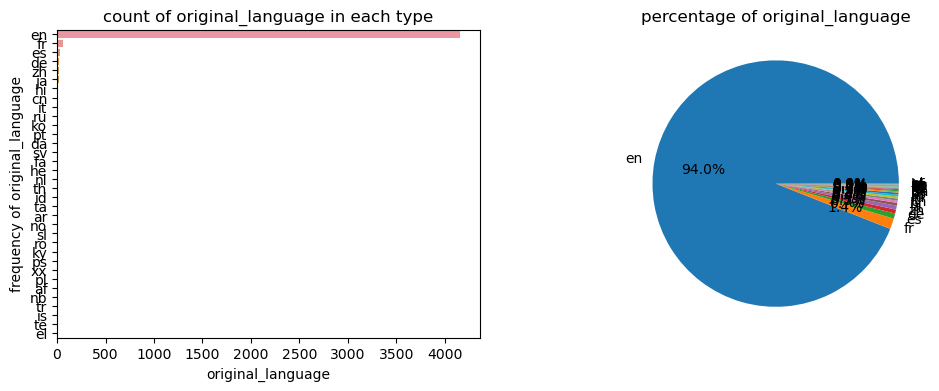

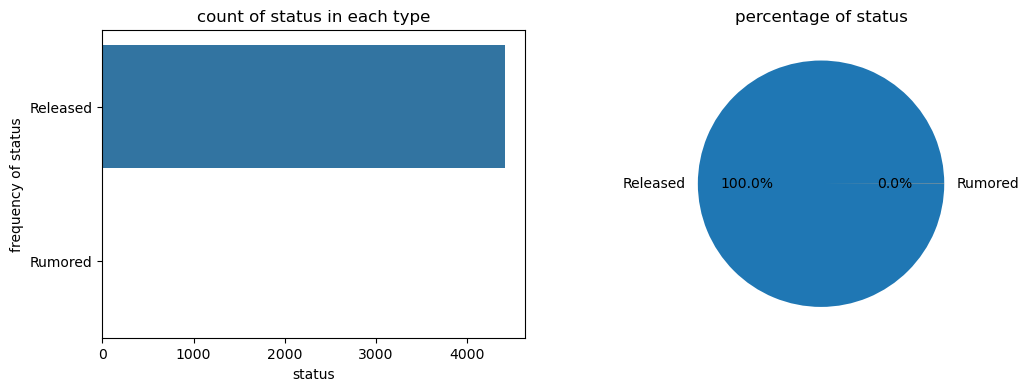

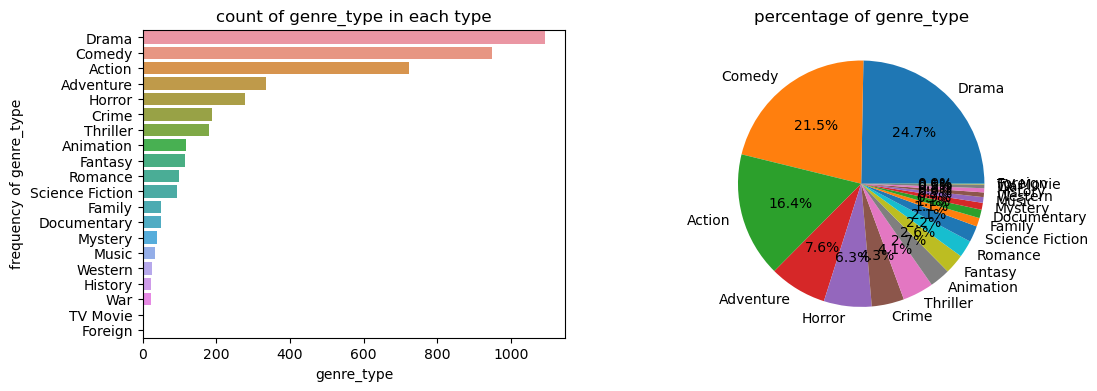

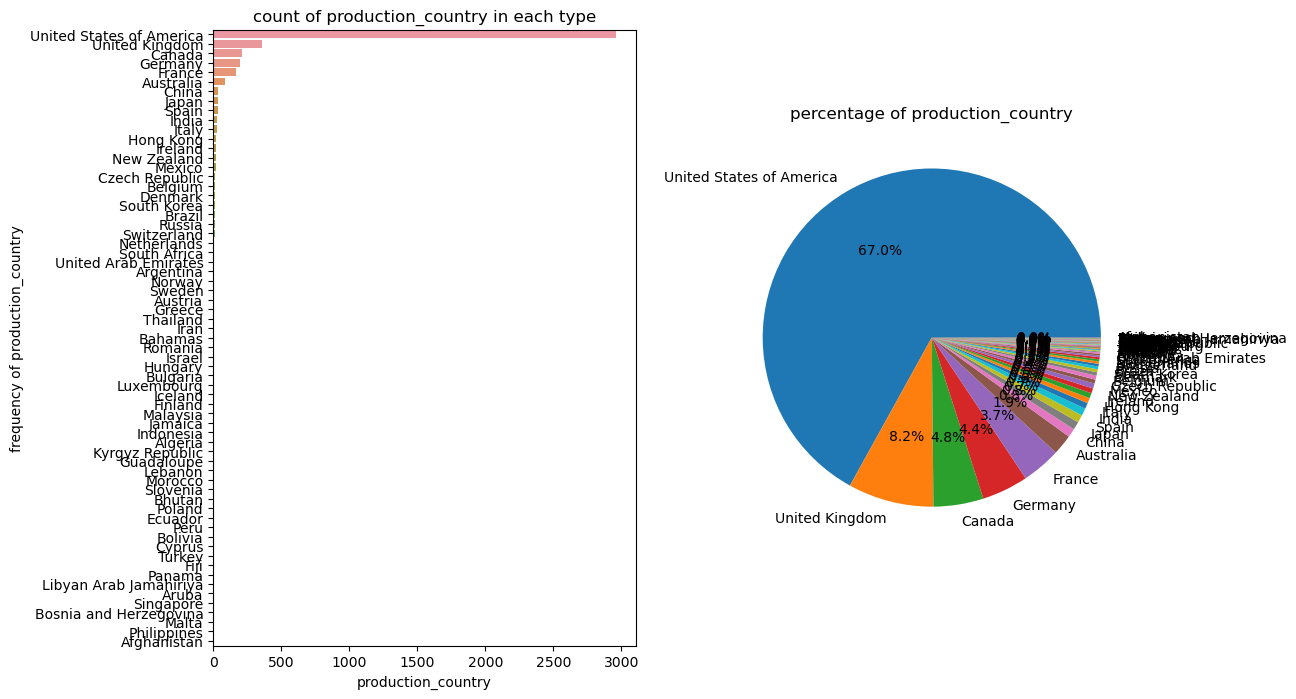

In [36]:
 bar_pie('original_language',
 'status',
 'genre_type',
 'production_country')

In [37]:
def hist_box(*s):
    for col in s:
        values=movie_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(values,bins=20,ax=ax[0])
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=movie_data[col],ax=ax[1])
        ax[1].set_title(f"Distribution using boxplot of {col}")

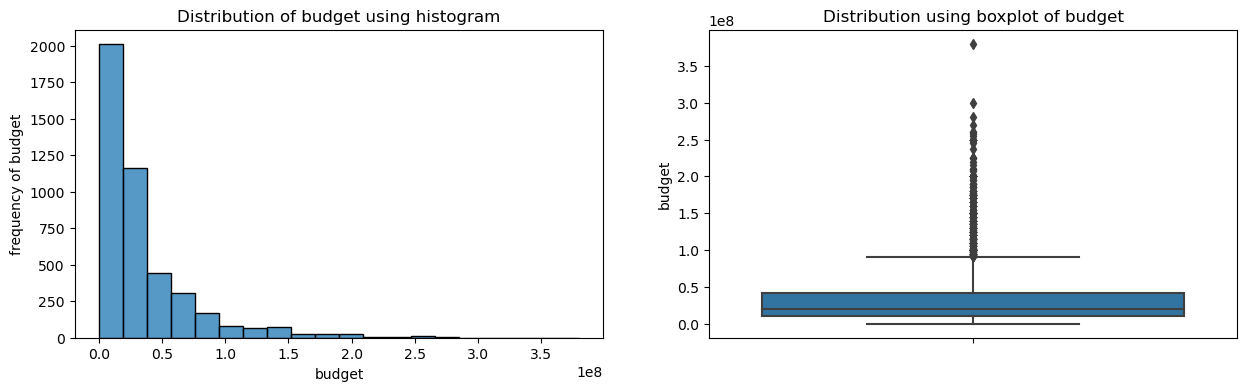

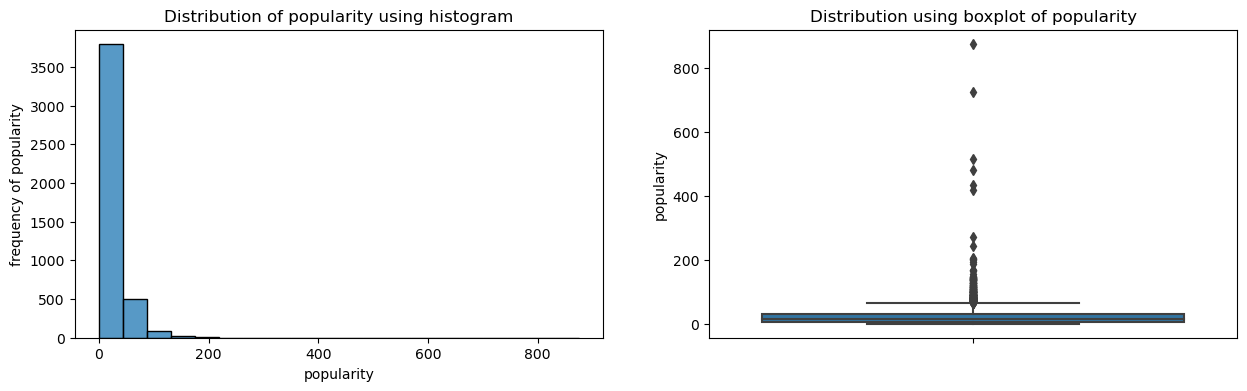

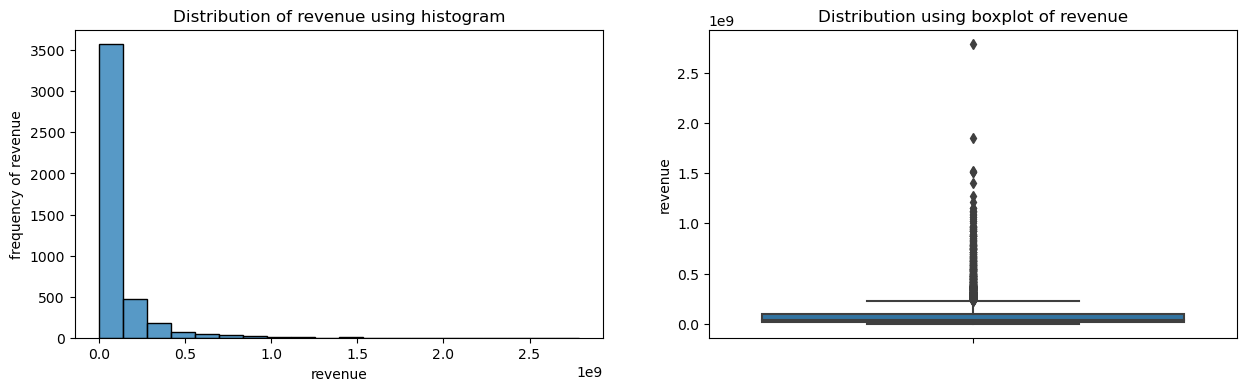

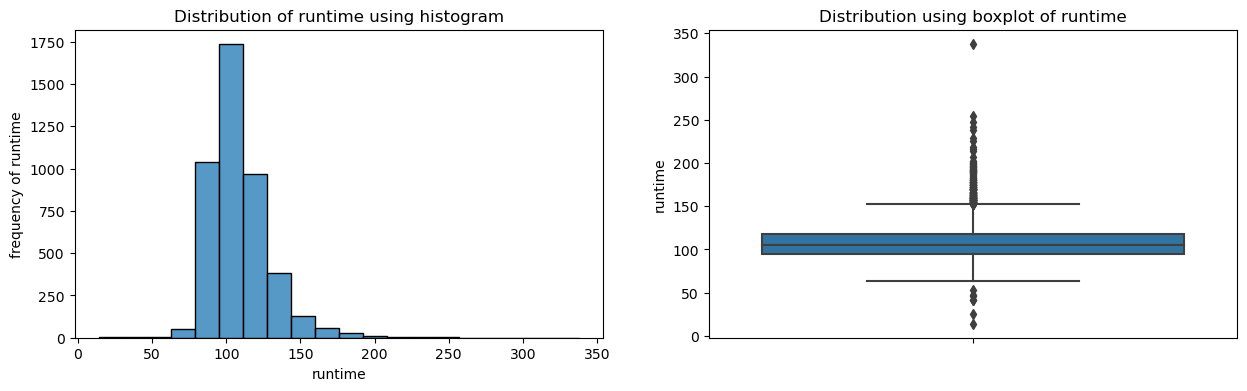

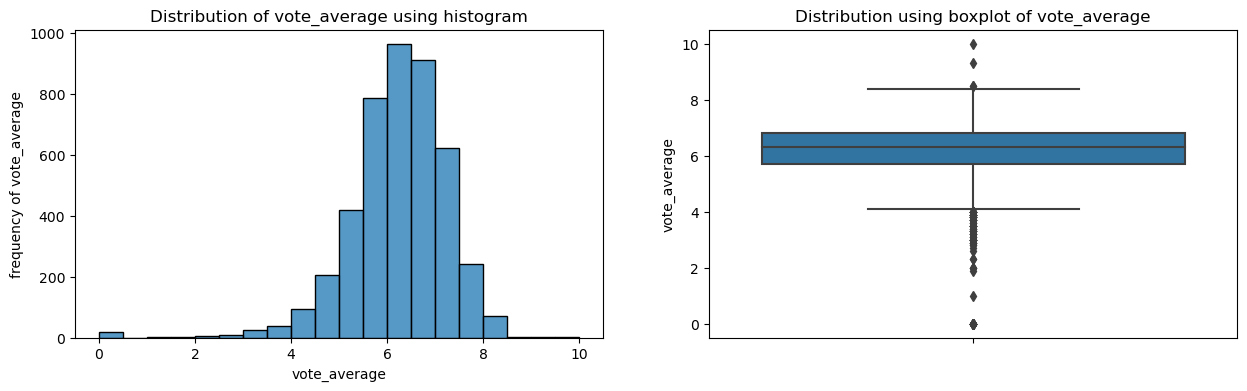

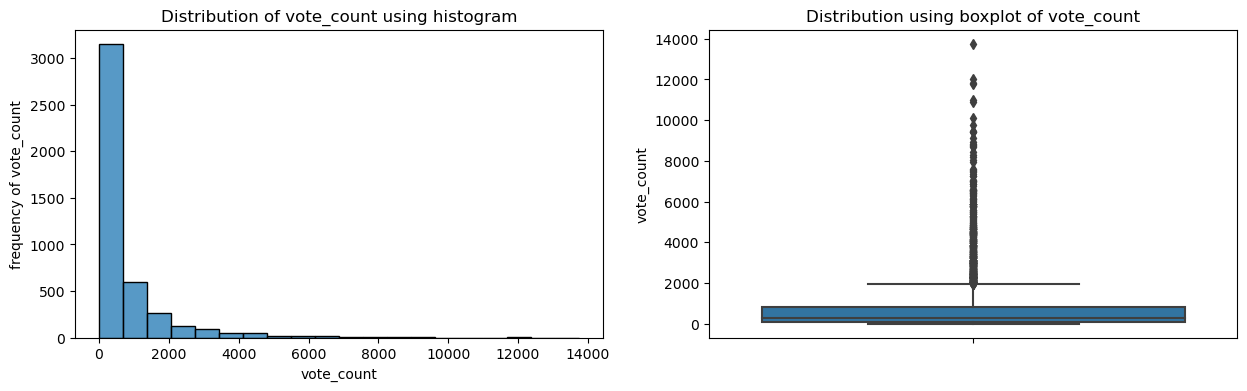

In [38]:
hist_box("budget","popularity","revenue","runtime","vote_average","vote_count")

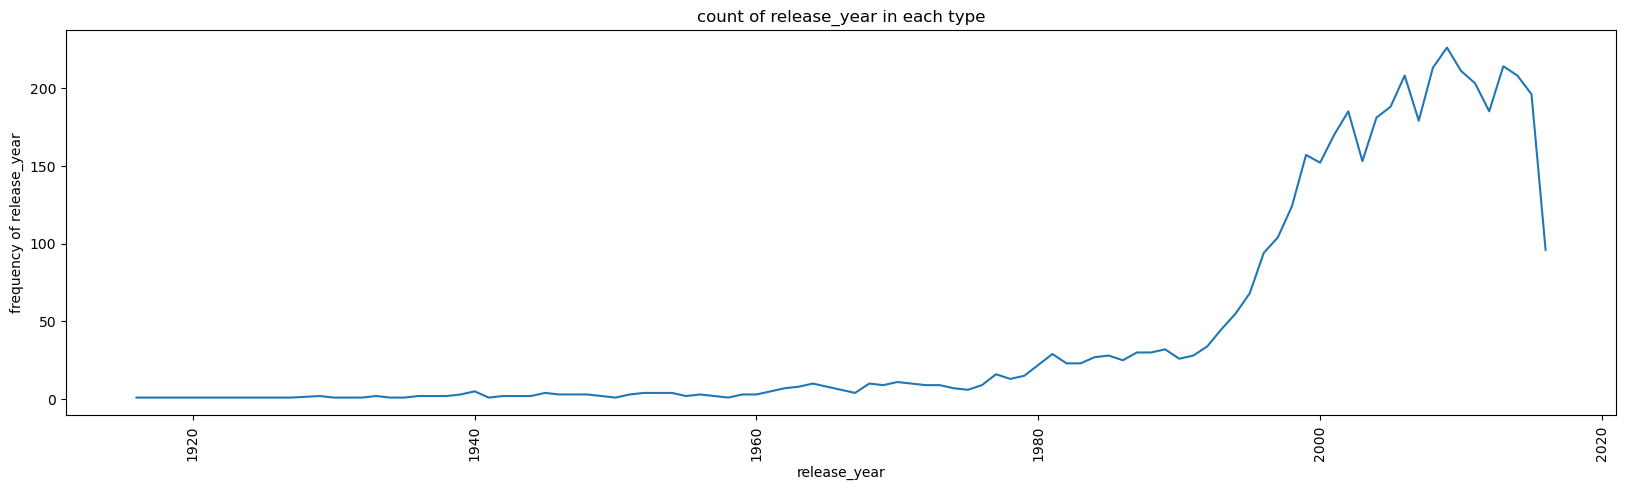

In [39]:
value_counts=movie_data["release_year"].value_counts()
plt.figure(figsize=(20,5))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_year in each type")
plt.xlabel("release_year")
plt.ylabel("frequency of release_year")
plt.xticks(rotation=90)
plt.show()

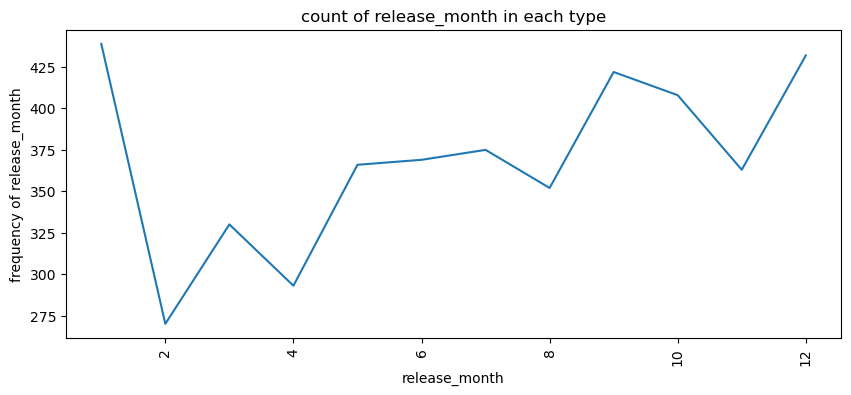

In [40]:
value_counts=movie_data["release_month"].value_counts()
plt.figure(figsize=(10,4))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_month in each type")
plt.xlabel("release_month")
plt.ylabel("frequency of release_month")
plt.xticks(rotation=90)
plt.show()

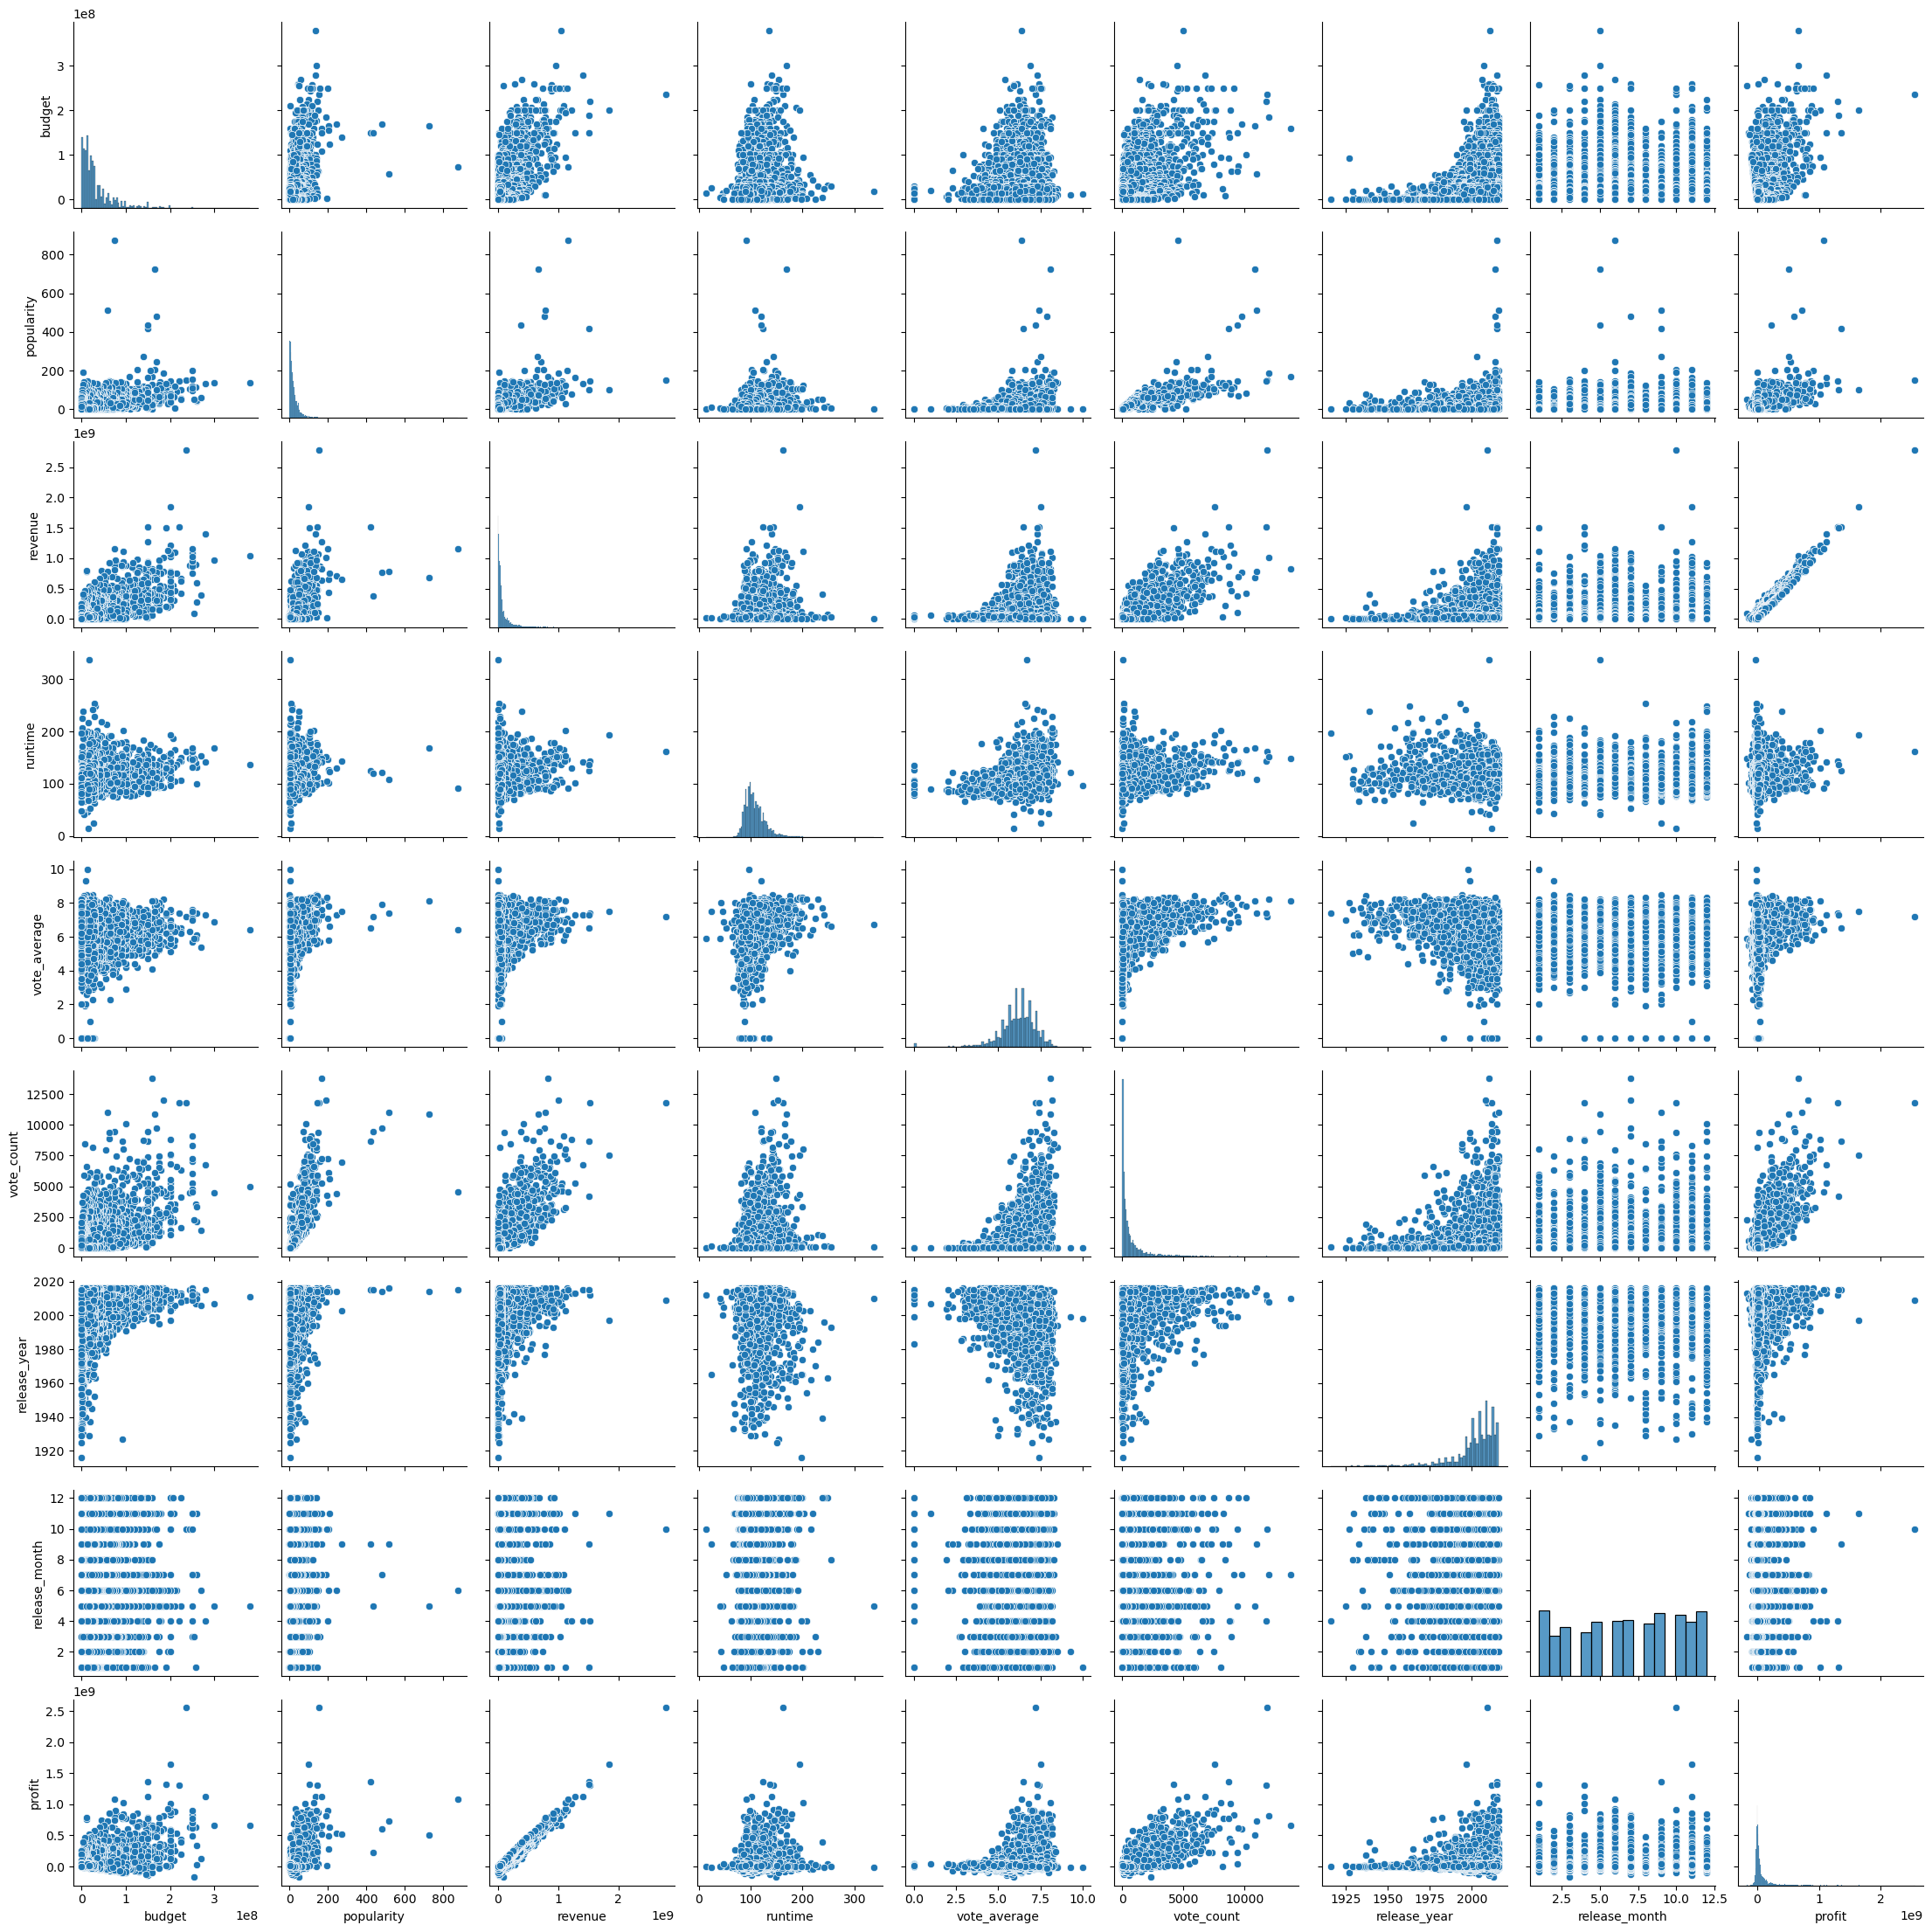

In [41]:
sns.pairplot(movie_data)
plt.show()

## Bivariate

In [42]:
def bi_rat(*s):
        fig,ax=plt.subplots(2,1,figsize=(15,10))
        ax=ax.ravel()
       
        for col in s:
            sns.lineplot(x="release_year",y=col,data=movie_data,ax=ax[0])
            ax[0].set_title(f"release_year wise {col}")
            sns.lineplot(x="release_month",y=col,data=movie_data,ax=ax[1])
            ax[1].set_title(f"release_month wise {col}")
        plt.show()

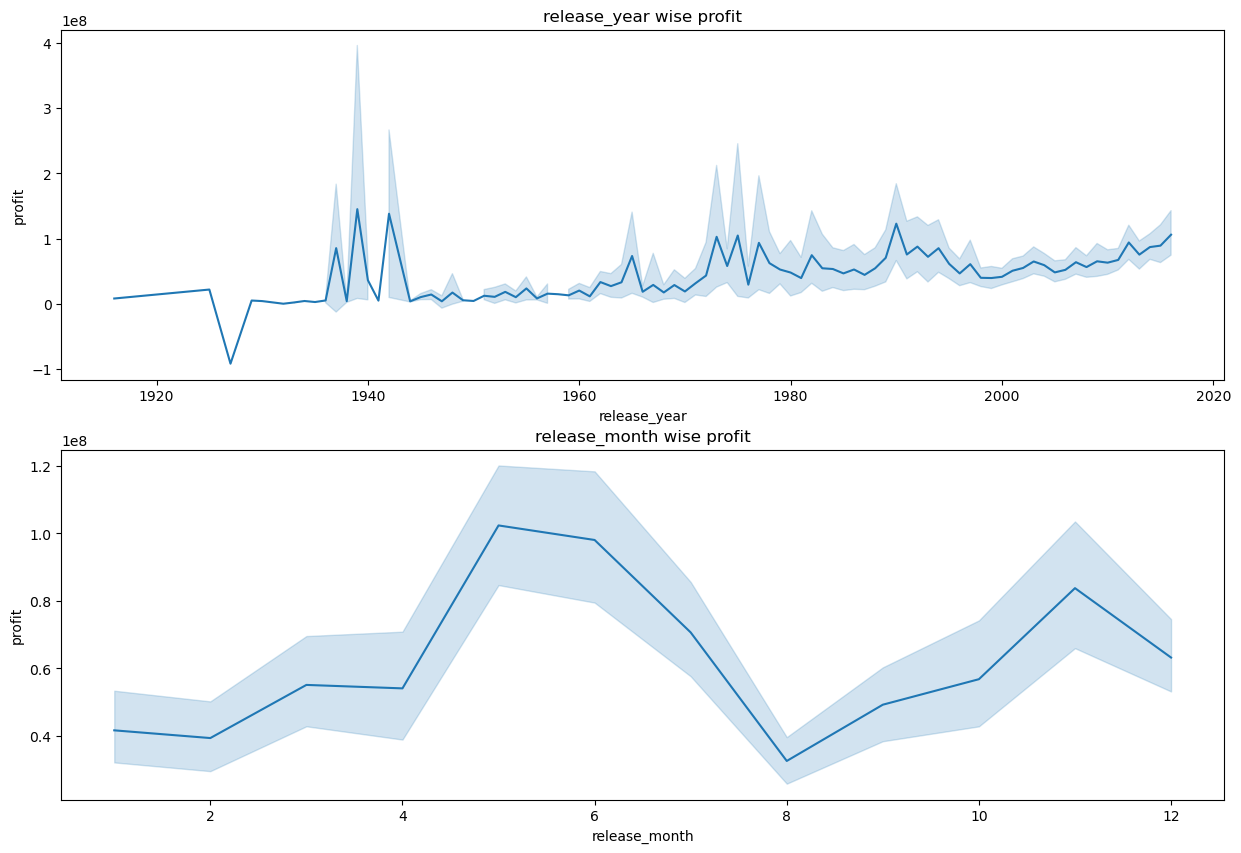

In [43]:
bi_rat("profit")

In [44]:
def cat_profits(col):
    sorted_df=movie_data.sort_values("profit",ascending=False).head(10)
    plt.figure(figsize=(5,3))
    sns.barplot(y= sorted_df[col], x=sorted_df['profit'], data= movie_data,orient="h")
    plt.ylabel(col)
    plt.xlabel('profit')
    plt.title(f'{col} vs profit')
    plt.show()

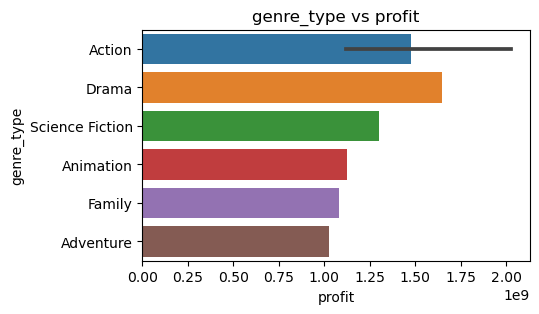

In [45]:
cat_profits("genre_type")

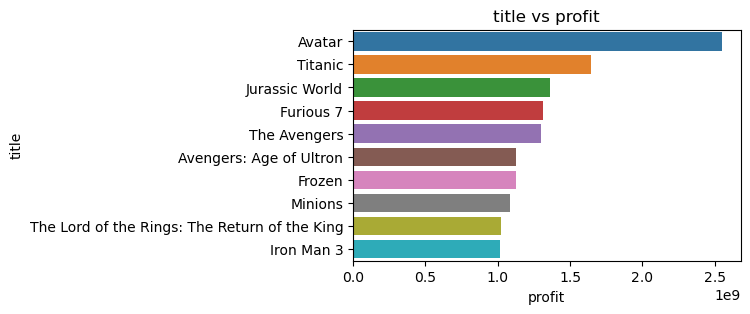

In [46]:
cat_profits("title")

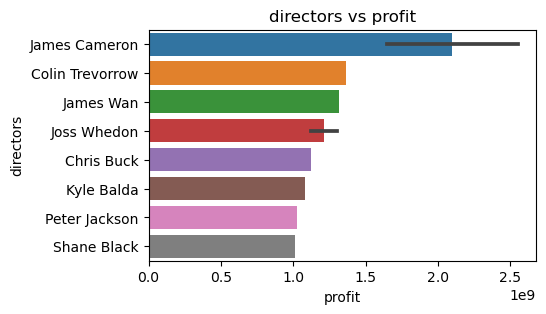

In [47]:
cat_profits("directors")

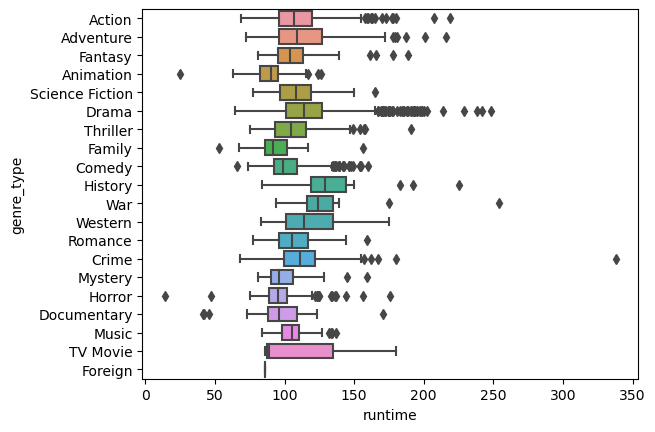

In [48]:
sns.boxplot(x="runtime",y="genre_type",data=movie_data)
plt.show()

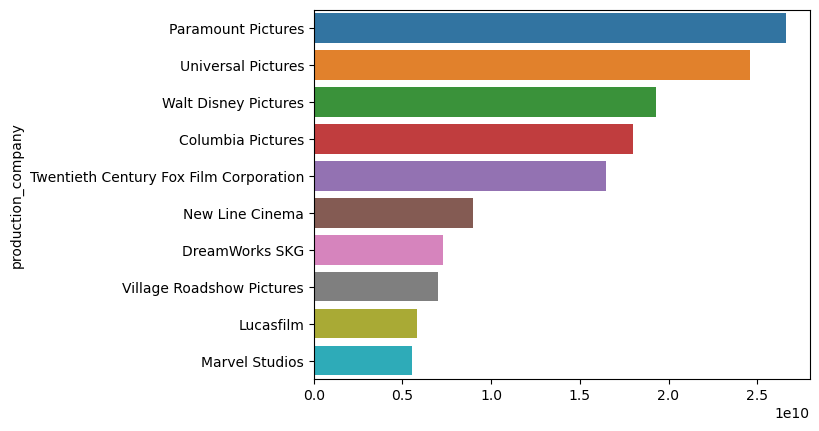

In [49]:
top_10 = movie_data.groupby(movie_data['production_company'])['profit'].sum()
top_10=top_10.sort_values(ascending=False).head(10)
sns.barplot(y=top_10.index,x=top_10.values)
plt.show()

## Multivariate

### 1. Show top 10 action movies which are released after 2012 based on revenue

In [50]:
task1=movie_data[(movie_data["status"]=="Released") & (movie_data["release_year"]>2011)]
task1=task1.sort_values("revenue",ascending=False).head(10)

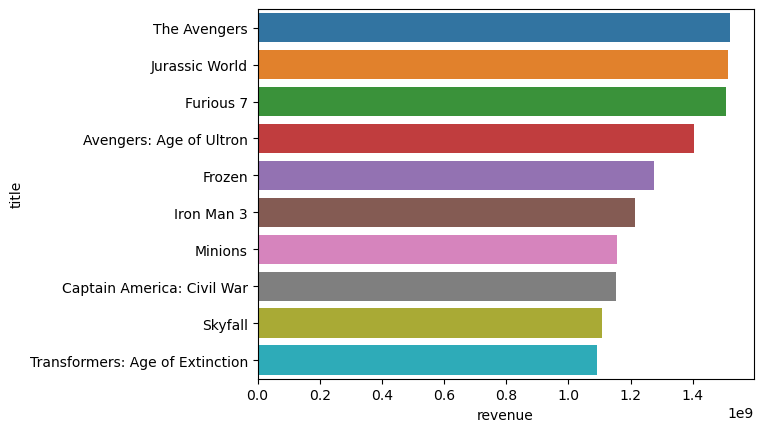

In [51]:
sns.barplot(y=task1["title"],x=task1["revenue"])
plt.show()

### 2. Show top 10 popular drama type english movies with minimum runtime 150 mins.

In [52]:
task2=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["original_language"]=="en") & (movie_data["runtime"]>=150)]
task2=task2.sort_values("popularity",ascending=False).head(10)

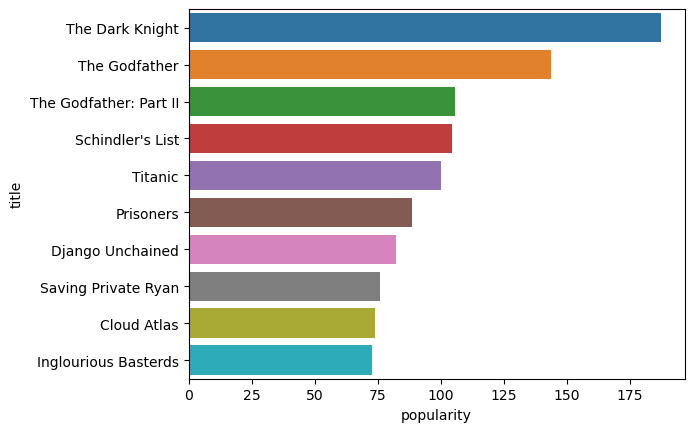

In [53]:
sns.barplot(y=task2["title"],x=task2["popularity"])
plt.show()

### 3.Top 10 directors based on total profit who released movie in between 2000 to 2010 and popularity over 100.

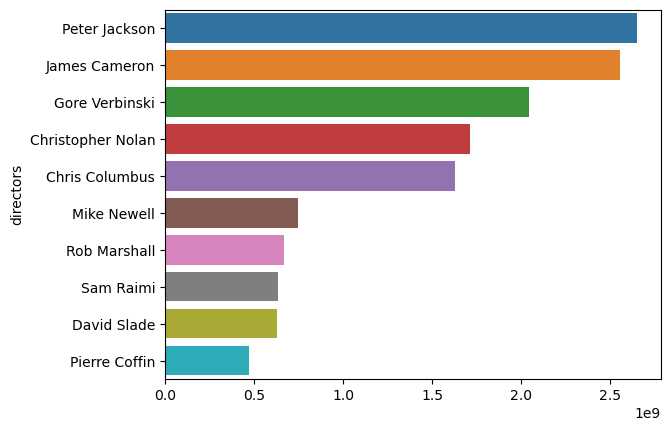

In [54]:

task3=movie_data[(movie_data["popularity"]>=100) & (movie_data["release_year"].between(2000,2011))]
task3 = task3.groupby(task3['directors'])['profit'].sum()
task3=task3.sort_values(ascending=False).head(10)
sns.barplot(y=task3.index,x=task3.values)
plt.show()

### 4. Top 10 popular movie's lead actor's name who worked with Walt Disney Pictures movie production company and did comedy movie.

In [55]:
task4=movie_data[(movie_data["production_company"]=="Walt Disney Pictures") & (movie_data["genre_type"]=="Comedy")]
task4=task4.sort_values("popularity",ascending=False).head(10)

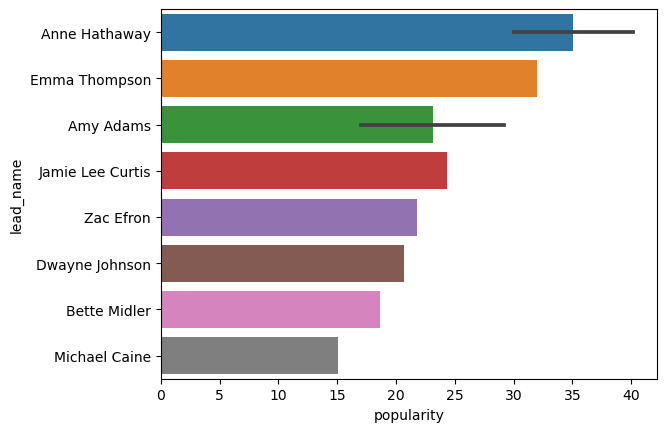

In [56]:
sns.barplot(y=task4["lead_name"],x=task4["popularity"])
plt.show()

### 5. Top 10 directors with highest budget that movie released after 2010 and avg vote got more than 5 and released in the month of may or june.

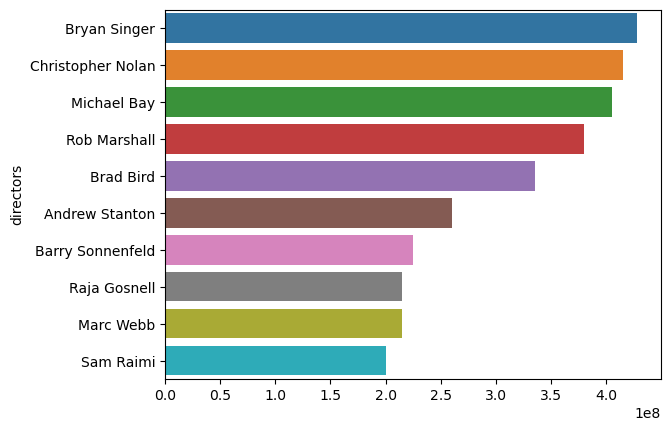

In [57]:

task5=movie_data[(movie_data["vote_average"]>5) & (movie_data["release_year"]>2010) & (movie_data["release_month"].between(5,7))]
task5 = movie_data.groupby(task5['directors'])['budget'].sum()
task5=task5.sort_values(ascending=False).head(10)
sns.barplot(y=task5.index,x=task5.values)
plt.show()

### 6. Top 5  drama type movies based on profit which released between october to december

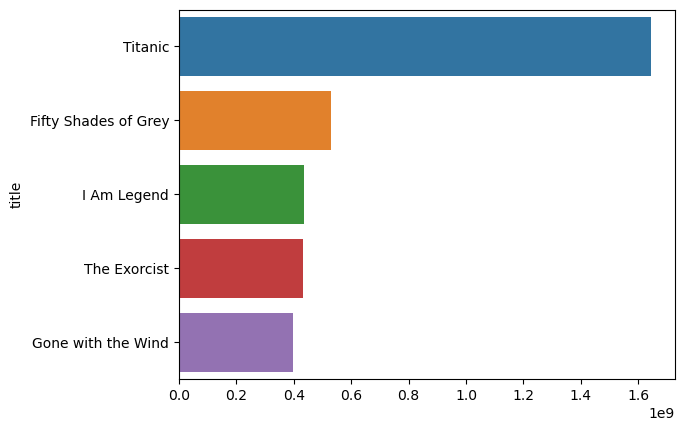

In [58]:
task6=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["release_month"].between(10,12))]
task6 = task6.groupby(task6['title'])['profit'].sum()
task6=task6.sort_values(ascending=False).head(5)
sns.barplot(y=task6.index,x=task6.values)
plt.show()

### 7. Top 5 action type english movies based on budget which released between april to august

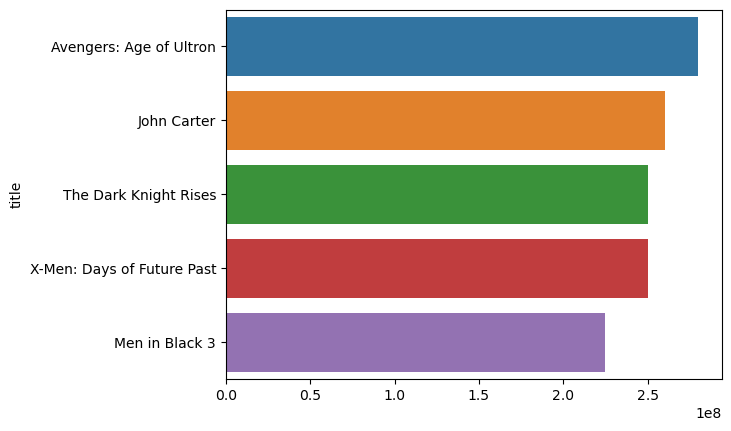

In [59]:
task7=movie_data[(movie_data["genre_type"]=="Action") & (movie_data["release_month"].between(4,8))&(movie_data["original_language"]=="en")]
task7 = task7.groupby(task7['title'])['budget'].sum()
task7=task7.sort_values(ascending=False).head(5)
sns.barplot(y=task7.index,x=task7.values)
plt.show()

### exporting data as csv file

In [483]:
# movie_data.to_csv("movie_data.csv")

##  -----------------------------------------------------Machine Learning-----------------------------------------------------

In [484]:
new_data=movie_data.copy()
new_data.reset_index(drop=True,inplace=True)
new_data.head(2)

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,title,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chatacter_name,directors,profit
0,237000000.0,en,150.437577,2.787965e+09,162.0,Released,7.2,11800,Avatar,2009.0,10.0,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2.550965e+09
1,300000000.0,en,139.082615,9.610000e+08,169.0,Released,6.9,4500,Pirates of the Caribbean: At World's End,2007.0,5.0,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,6.610000e+08


## Feature Extraction

In [485]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               4419 non-null   float64
 1   original_language    4419 non-null   object 
 2   popularity           4419 non-null   float64
 3   revenue              4419 non-null   float64
 4   runtime              4419 non-null   float64
 5   status               4419 non-null   object 
 6   vote_average         4419 non-null   float64
 7   vote_count           4419 non-null   int64  
 8   title                4419 non-null   object 
 9   release_year         4419 non-null   float64
 10  release_month        4419 non-null   float64
 11  genre_type           4419 non-null   object 
 12  production_country   4419 non-null   object 
 13  lead_name            4419 non-null   object 
 14  production_company   4419 non-null   object 
 15  lead_chatacter_name  4419 non-null   o

In [486]:
# converting all categorical values to numerical values.
for col in new_data.select_dtypes("object"):
     new_data[col]=LabelEncoder().fit_transform(new_data[col])

## Correlations between features

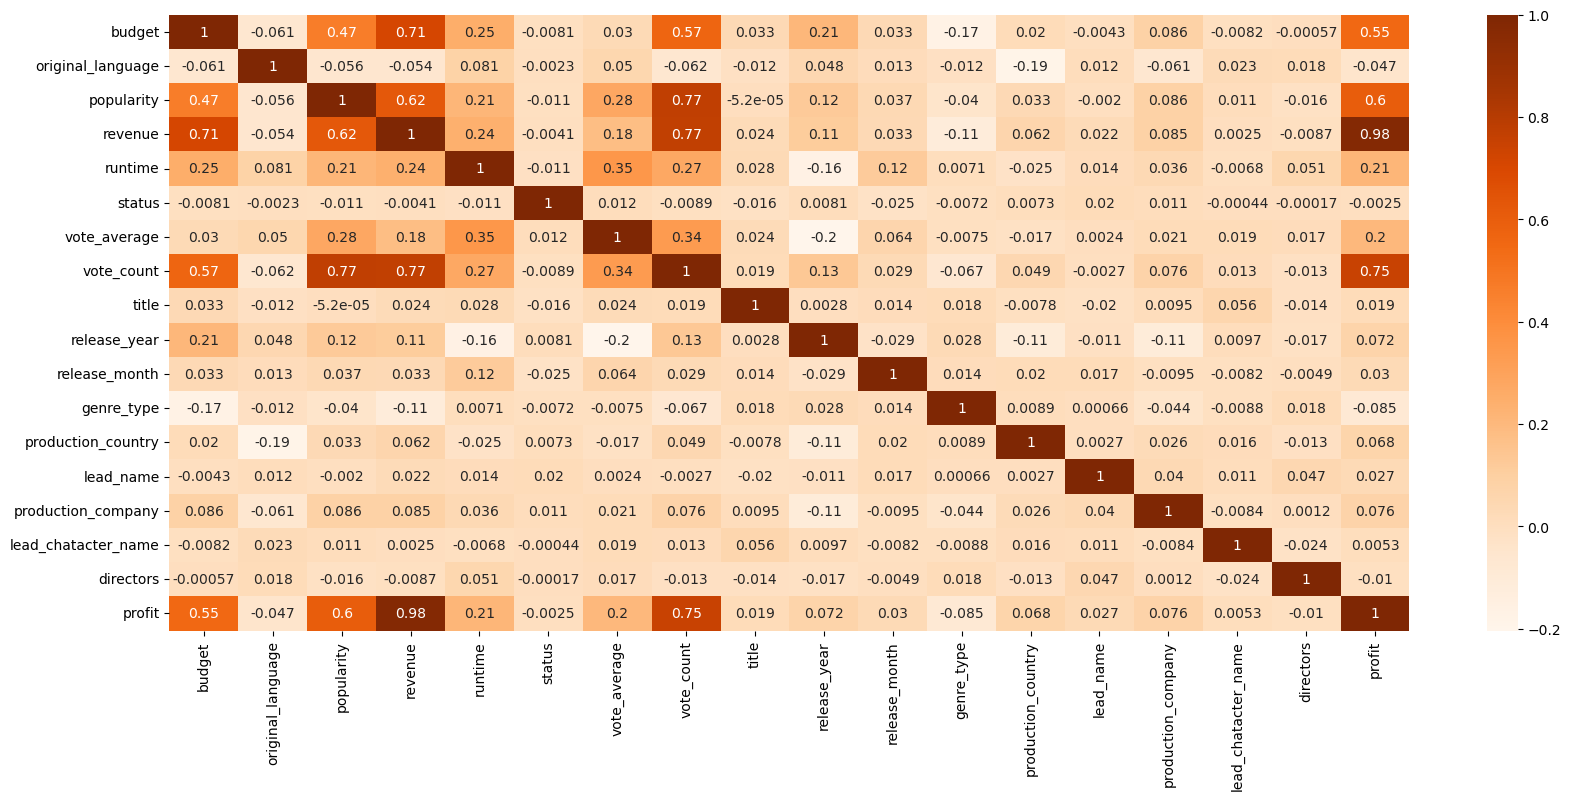

In [487]:
# correlations between features
correlation_matrix=new_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix,annot=True,cmap="Oranges")
plt.show()

### Feature selection by dropping unnecessary columns

In [488]:
new_data.drop(["status","profit","directors","lead_chatacter_name","popularity"],axis=1,inplace=True)

In [489]:
X=new_data.drop(["revenue"],axis=1)
y=new_data["revenue"]

### Scaling data

In [490]:
scaled_x=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [491]:
scaled_data=scaled_x.copy()
scaled_data["revenue"]=y
scaled_data

,budget,original_language,runtime,vote_average,vote_count,title,release_year,release_month,genre_type,production_country,lead_name,production_company,revenue
0,5.076049,-0.15457,2.602407,1.001802,8.700719,-1.456906,0.536974,0.936911,-1.117771,0.539427,1.161617,-0.388329,2.787965e+09
1,6.654366,-0.15457,2.942188,0.706376,2.953334,0.169474,0.379516,-0.489862,-0.905413,0.539427,-0.093289,1.286313,9.610000e+08
2,5.276470,-0.15457,1.922845,0.115523,2.926565,0.554505,1.009347,0.936911,-1.117771,0.486746,-1.015795,-1.283397,8.806746e+08
3,5.401733,-0.15457,2.748028,1.395704,6.579698,0.873664,0.773161,0.080847,-1.117771,0.539427,-1.146515,-0.178343,1.084939e+09
4,5.652260,-0.15457,1.146202,-0.081428,1.082678,-0.362981,0.773161,0.080847,-1.117771,0.539427,1.436128,1.286313,2.841391e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,-0.535743,-0.15457,-0.504163,-0.179903,-0.588788,-1.427892,-0.565230,0.651557,0.156373,0.539427,-0.989651,-1.708619,5.749503e+07
4415,-0.861252,-0.15457,-1.523506,0.706376,-0.071523,0.210252,0.143330,0.366202,2.067587,0.539427,1.253121,1.052703,4.247600e+05
4416,-0.855916,0.19679,-1.329346,0.410949,-0.402194,-0.905631,-0.801417,-0.775217,-1.117771,-0.619564,-1.266029,-1.283397,2.040920e+06
4417,-0.360375,-0.15457,0.563720,0.804851,-0.584851,0.477655,0.851890,0.936911,-0.480699,0.539427,-0.748754,-0.745306,3.866335e+07


## Data Splitting

In [492]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [493]:
kf=KFold(n_splits=5,shuffle=True, random_state=42)

## Collection of Performance metrics to show all values in one place

In [494]:
def adjusted_r2_score(model,x,y):
    r2_scores=model.score(x,y)
    n=x.count()
    x=len(x_test.columns)-1
    adjusted_r2_score=1-((1-r2_scores)*(n-1)/(n-x-1))
    return adjusted_r2_score[0]

In [495]:
r2_train=[]
r2_test=[]
rmse=[]
mse=[]
mae=[]
mape=[]
def metrics():
    r2_train.append(R2_TRAIN)
    r2_test.append(R2_TEST)
    rmse.append(RMSE)
    mse.append(MSE)
    mae.append(MAE)
    mape.append(MAPE)
    

In [496]:
def metrics_print(model):
    print("Model adjusted r2 score on training data :",adjusted_r2_score(model,x_train,y_train))
    print("Model adjusted r2 score on test data :",adjusted_r2_score(model,x_test,y_test))
    
    average_adjusted_r2_score_train.append(adjusted_r2_score(model,x_train,y_train))
    average_adjusted_r2_score_test.append(adjusted_r2_score(model,x_test,y_test))
    print()
    
    RMSE1=mean_squared_error(y_test,y_pred,squared=False)
    print("RMSE:",RMSE1)
    avg_rmse.append(RMSE1)
    
    MSE1=mean_squared_error(y_test,y_pred)
    print("MSE:",MSE1)
    avg_mse.append(MSE1)
    
    MAE1=mean_absolute_error(y_test,y_pred)
    print("MAE:",MAE1)
    avg_mae.append(MAE1)
    
    MAPE1=mean_absolute_percentage_error(y_test,y_pred)
    print("MAPE:",MAPE1)
    avg_mape.append(MAPE1)
    print("--"*50)

In [497]:
def metrics_print1(model):
    R2_TRAIN=adjusted_r2_score(model,x_train,y_train)
    R2_TEST=adjusted_r2_score(model,x_test,y_test)
    print("Model adjusted r2 score on training data :",R2_TRAIN)
    print("Model adjusted r2 score on test data:",R2_TEST)
    print()


    RMSE=mean_squared_error(y_test,y_pred,squared=False)
    print("RMSE:",RMSE)

    MSE=mean_squared_error(y_test,y_pred)
    print("MSE:",MSE)

    MAE=mean_absolute_error(y_test,y_pred)
    print("MAE:",MAE)

    MAPE=mean_absolute_percentage_error(y_test,y_pred)
    print("MAPE:",MAPE)

    r2_train.append(R2_TRAIN)
    r2_test.append(R2_TEST)
    rmse.append(RMSE)
    mse.append(MSE)
    mae.append(MAE)
    mape.append(MAPE)

##  -------------------------------------------------------Model Ctreation-------------------------------------------------------

## Linear Regression

In [498]:
average_adjusted_r2_score_train=[]
average_adjusted_r2_score_test=[]
avg_rmse=[]
avg_mse=[]
avg_mae=[]
avg_mape=[]
for train_data,test_data in kf.split(scaled_data):
    train,test=scaled_data.iloc[train_data],scaled_data.iloc[test_data]
    x_train=train.drop(["revenue"],axis=1)
    y_train=train["revenue"]
    
    x_test=test.drop(["revenue"],axis=1)
    y_test=test["revenue"]
    
    lin_model=LinearRegression().fit(x_train,y_train)
    y_pred=lin_model.predict(x_test)
    
    print("Intercept:",lin_model.intercept_)
    print("slope:",lin_model.coef_)
    print()
    
    metrics_print(lin_model)
    
RMSE=np.mean(avg_rmse)  
MSE=np.mean(avg_mse) 
MAE=np.mean(avg_mae) 
MAPE=np.mean(avg_mape)
R2_TRAIN=np.mean(average_adjusted_r2_score_train)
R2_TEST=np.mean(average_adjusted_r2_score_test)

print("Average adjusted r2 score of train data on different K-Fold",R2_TRAIN)
print("Average adjusted r2 score of test data on different K-Fold",R2_TEST)
metrics()

Intercept: 97025185.32583001
slope: [ 6.73334749e+07  2.48686934e+06 -2.04336386e+06 -5.06907385e+06
  9.41285468e+07  9.36070746e+04 -8.89656305e+06  1.30985961e+06
 -3.27275400e+05  3.06734146e+06  4.17935840e+06 -2.66843899e+05]

Model adjusted r2 score on training data : 0.7015590890664831
Model adjusted r2 score on test data : 0.7135898139150181

RMSE: 81437673.87977621
MSE: 6632094726948784.0
MAE: 48435643.25386439
MAPE: 4363.517322943685
----------------------------------------------------------------------------------------------------
Intercept: 96444537.70661101
slope: [65626972.06916592  1607314.03049121 -4001639.47017517 -2014174.72794511
 86249539.47157593  1449727.82802492 -7677761.43318149   329530.18256426
  -105261.83639289  4586151.81814339  3564638.34414343   663380.184963  ]

Model adjusted r2 score on training data : 0.7103710183252818
Model adjusted r2 score on test data : 0.6796170666323644

RMSE: 108087566.14285907
MSE: 1.1682921954686936e+16
MAE: 52581414.35569

## Decision Tree Regression

In [499]:
param_grid={'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(10,101,20),
           'max_depth':np.arange(3,15)}

In [157]:
dt=DecisionTreeRegressor()

In [101]:
grid_cv=GridSearchCV(dt,param_grid,scoring="r2",cv=kf)

In [102]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='r2')

In [103]:
grid_cv.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=40)

In [500]:
dt_model=DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=40).fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [501]:
metrics_print1(dt_model)

Model adjusted r2 score on training data : 0.7759414975408406
Model adjusted r2 score on test data: 0.6750044149891896

RMSE: 88366913.45433412
MSE: 7808711393445777.0
MAE: 47503811.29387806
MAPE: 8858.01953059515


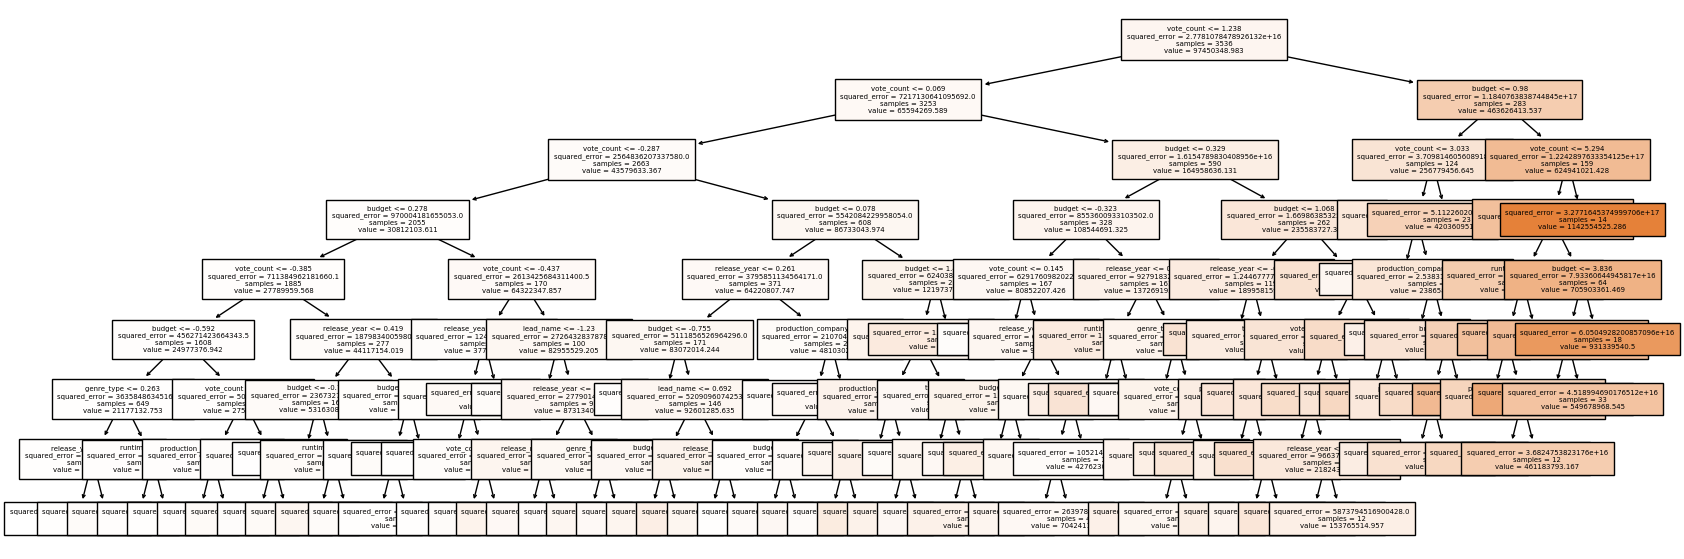

In [205]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=X.columns,filled=True,fontsize=5)
plt.show()

## Random forest Regression

In [175]:
param_grid={'n_estimators':np.arange(20,201,20),
           'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(10,101,20),
           'max_depth':np.arange(3,15)}

In [176]:
rf=RandomForestRegressor()

In [177]:
grid_cv=GridSearchCV(rf,param_grid,scoring="r2",cv=kf)

In [178]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])},
             scoring='r2')

In [179]:
grid_cv.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=80)

In [502]:
rf_model=RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=80,random_state=42).fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [503]:
metrics_print1(rf_model)

Model adjusted r2 score on training data : 0.8133474960323932
Model adjusted r2 score on test data: 0.7713394579606826

RMSE: 74121904.49740851
MSE: 5494056726322948.0
MAE: 42215343.54016768
MAPE: 8827.76814423243


## Adaboost Regression

In [182]:
param_grid={"n_estimators": np.arange(10,101,10),
           "learning_rate":np.arange(0.05,1,0.05)}

In [183]:
ada=AdaBoostRegressor()

In [109]:
grid_cv=GridSearchCV(ada,param_grid,scoring="r2",cv=kf)

In [110]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='r2')

In [113]:
grid_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.2, n_estimators=10)

In [504]:
ada_model=AdaBoostRegressor(learning_rate=0.2, n_estimators=10, random_state=42).fit(x_train,y_train)
y_pred=ada_model.predict(x_test)

In [505]:
metrics_print1(ada_model)

Model adjusted r2 score on training data : 0.7492186682808355
Model adjusted r2 score on test data: 0.7031894908558194

RMSE: 84448237.94610445
MSE: 7131504892201875.0
MAE: 49205559.70811075
MAPE: 12503.941769805577


## K-Nearest Neighbors Regression

In [129]:
r2_scores=[]
for k in range(5,30):
    knn_score=cross_val_score(KNeighborsRegressor(k),x_train,y_train,scoring="r2",cv=kf)
    r2_scores.append(np.mean(knn_score))

In [130]:
for k in range(5,30):
    print("number of neighbors:",k,":",r2_scores[k-5])

number of neighbors: 5 : 0.6474529431487299
number of neighbors: 6 : 0.6527226714413082
number of neighbors: 7 : 0.6520576556162958
number of neighbors: 8 : 0.6574207507045261
number of neighbors: 9 : 0.6582920454416394
number of neighbors: 10 : 0.6583343798015526
number of neighbors: 11 : 0.6611786120686546
number of neighbors: 12 : 0.6649116979487679
number of neighbors: 13 : 0.6656216268926471
number of neighbors: 14 : 0.6659868578646035
number of neighbors: 15 : 0.6656799784604279
number of neighbors: 16 : 0.6644903910875913
number of neighbors: 17 : 0.662714352038152
number of neighbors: 18 : 0.6619160512524552
number of neighbors: 19 : 0.6622663402025987
number of neighbors: 20 : 0.6593718599896057
number of neighbors: 21 : 0.6567206820455784
number of neighbors: 22 : 0.6551774488501938
number of neighbors: 23 : 0.6559075457459475
number of neighbors: 24 : 0.6553860082286587
number of neighbors: 25 : 0.6522976582756655
number of neighbors: 26 : 0.6496654184835272
number of neighb

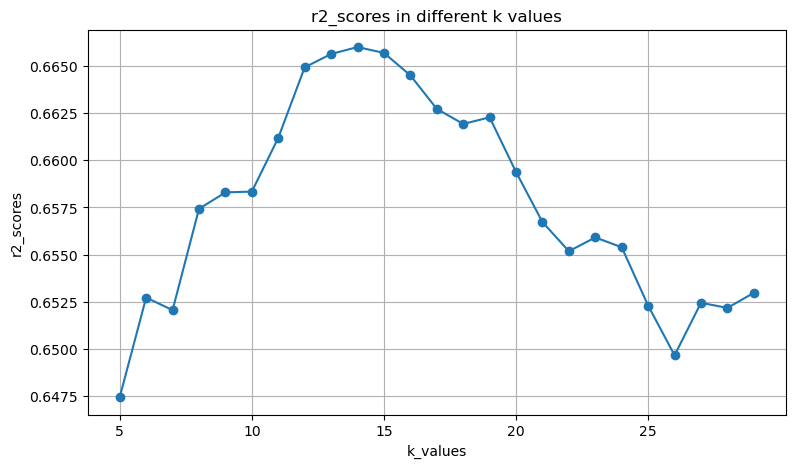

In [131]:
plt.figure(figsize=(9,5))
plt.plot(range(5,30),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(5,30,5))
plt.grid()
plt.show()

In [506]:
k=14
knn_model=KNeighborsRegressor(k).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [507]:
metrics_print1(knn_model)

Model adjusted r2 score on training data : 0.7212371121444519
Model adjusted r2 score on test data: 0.7397928495747015

RMSE: 79069786.95250624
MSE: 6252031208714727.0
MAE: 47421237.467316285
MAPE: 13104.616581263343


## Stacked Regression

In [384]:
level1=[]
level1.append(("lr",LinearRegression()))
level1.append(("dt",DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=40,random_state=42)))
level1.append(("rf",RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=80,random_state=42)))
level1.append(("ada",AdaBoostRegressor(learning_rate=0.2, n_estimators=10, random_state=42)))
level1.append(("knn",KNeighborsRegressor(14)))
level1.append(("svr",SVR()))

level2=LinearRegression()

In [508]:
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf).fit(x_train,y_train)
y_pred=stack_model.predict(x_test)

In [509]:
metrics_print1(stack_model)

Model adjusted r2 score on training data : 0.8034106014077032
Model adjusted r2 score on test data: 0.7714546831104978

RMSE: 74103226.62738794
MSE: 5491288196590018.0
MAE: 42703735.15294366
MAPE: 7462.511621267576


## Best Model Selection

In [510]:
model_list=["Linear Regression","Decision Tree Regression","Random Forest Regression","Ada-boost Regression","KNN Regression","Stacked Regression"]
metric_list=["Models","r2 Score(Train)","r2 Score(Test)","RMSE","MSE","MAE","MAPE"]

In [511]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    x=[[model_list[i],r2_train[i],r2_test[i],rmse[i],mse[i],mae[i],mape[i]]]
    new=pd.DataFrame(x)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,r2 Score(Train),r2 Score(Test),RMSE,MSE,MAE,MAPE
0,Linear Regression,0.705203,0.697127,8.976791e+07,8.147538e+15,5.054771e+07,4076.914434
1,Decision Tree Regression,0.775941,0.675004,8.836691e+07,7.808711e+15,4.750381e+07,8858.019531
2,Random Forest Regression,0.813347,0.771339,7.412190e+07,5.494057e+15,4.221534e+07,8827.768144
3,Ada-boost Regression,0.749219,0.703189,8.444824e+07,7.131505e+15,4.920556e+07,12503.941770
4,KNN Regression,0.721237,0.739793,7.906979e+07,6.252031e+15,4.742124e+07,13104.616581
5,Stacked Regression,0.803411,0.771455,7.410323e+07,5.491288e+15,4.270374e+07,7462.511621


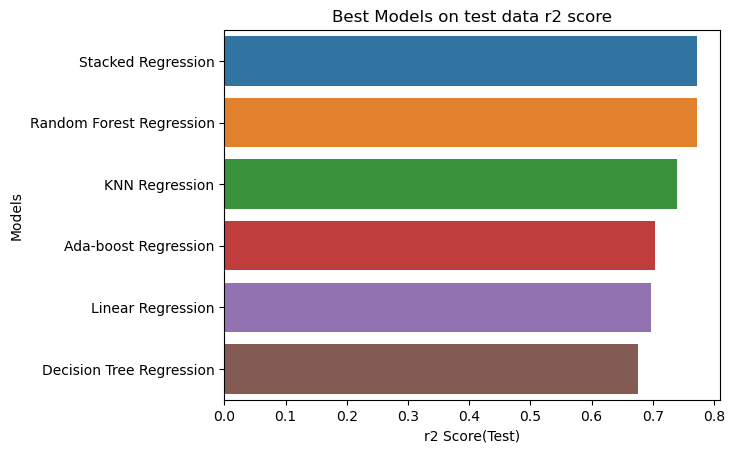

In [512]:
results=final_results.sort_values("r2 Score(Test)",ascending=False)
sns.barplot(x="r2 Score(Test)",y="Models",data=results)
plt.title("Best Models on test data r2 score")
plt.show()

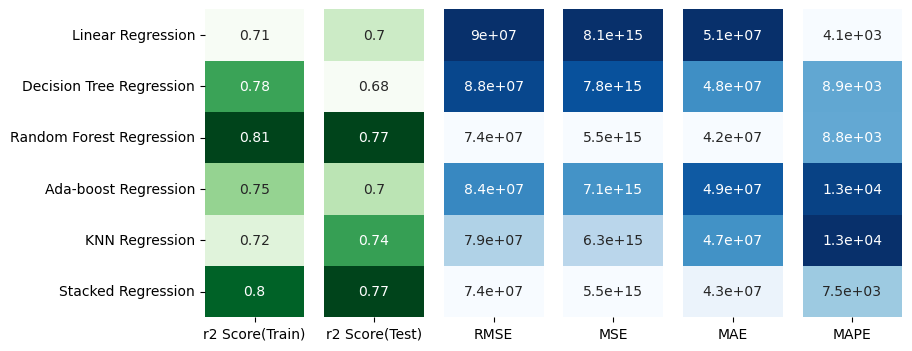

In [513]:
fig,ax=plt.subplots(1,6,figsize=(9,4))

sns.heatmap(final_results[["r2 Score(Train)"]],annot=True,yticklabels=model_list,ax=ax[0],cbar=False,cmap="Greens")
sns.heatmap(final_results[["r2 Score(Test)"]],annot=True,ax=ax[1],yticklabels=False,cbar=False,cmap="Greens")
sns.heatmap(final_results[["RMSE"]],annot=True,ax=ax[2],yticklabels=False,cbar=False,cmap="Blues")
sns.heatmap(final_results[["MSE"]],annot=True,ax=ax[3],yticklabels=False,cbar=False,cmap="Blues")
sns.heatmap(final_results[["MAE"]],annot=True,ax=ax[4],yticklabels=False,cbar=False,cmap="Blues")
sns.heatmap(final_results[["MAPE"]],annot=True,ax=ax[5],yticklabels=False,cbar=False,cmap="Blues")

plt.show()

In [514]:
lin_score=average_adjusted_r2_score_test
dt_score=cross_val_score(dt_model,X,y,scoring="r2",cv=kf)
rf_score=cross_val_score(rf_model,X,y,scoring="r2",cv=kf)
ada_score=cross_val_score(ada_model,X,y,scoring="r2",cv=kf)
knn_score=cross_val_score(knn_model,X,y,scoring="r2",cv=kf)
stack_score=cross_val_score(stack_model,X,y,scoring="r2",cv=kf)

all_scores=[lin_score,dt_score,rf_score,ada_score,knn_score,stack_score]

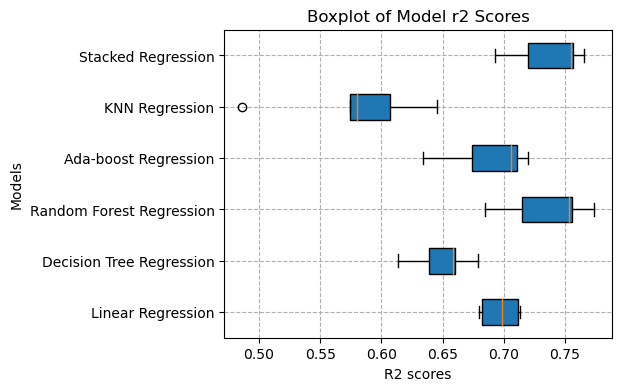

In [515]:
plt.figure(figsize=(5,4))
plt.boxplot(all_scores,labels=model_list,vert=False,patch_artist=True)
plt.title("Boxplot of Model r2 Scores")
plt.xlabel("R2 scores")
plt.ylabel("Models")
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()